In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Carseats.csv")
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
df=df.drop(["Unnamed: 0"],axis=1)

In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
#check for categorical variables
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

#### cheking the unique values in each categorical columns
#### also checking for outliers in non categorical columns

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


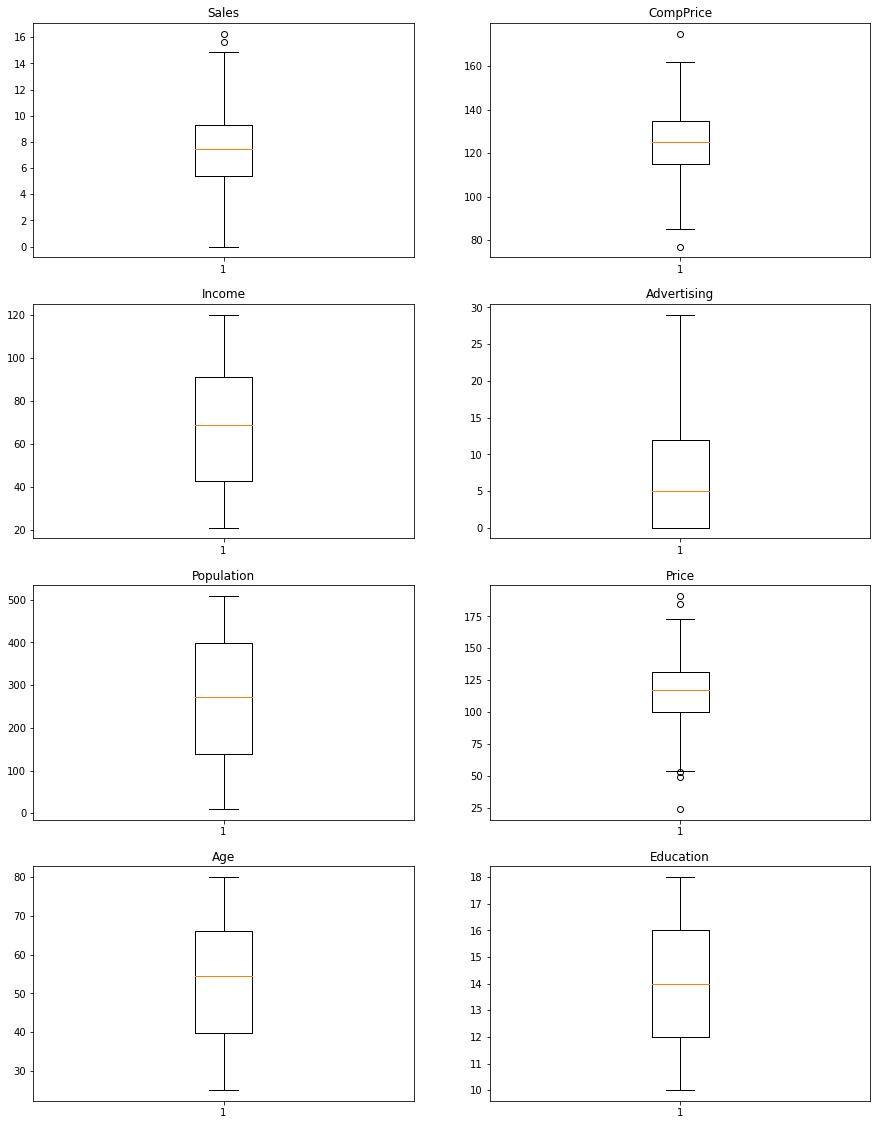

In [8]:
plt.figure(figsize=(15,25))
count=1
for column in df:
    if (df[column].dtype=="O"):
        print("Unique values in {} = {}".format(column,df[column].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(df[column])
        plt.title(column)
        count+=1
plt.show()

In [9]:
#copy the first daset
df2=df.copy()
df2["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [10]:
### applying the label encoding to ShelveLoc column
my_dict={
    "Bad":0,
    "Good":2,
    "Medium":1
}
df2["ShelveLoc_new"]=df2["ShelveLoc"].map(my_dict)

In [11]:
df2["ShelveLoc_new"].unique()

array([0, 2, 1], dtype=int64)

In [12]:
#drop the ShelveLoc column
df2.drop("ShelveLoc",axis=1,inplace = True)

In [13]:
#one hot encoding the other two columns and droping the first two rows
df2=pd.get_dummies(df2,drop_first=True)
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,1
1,11.22,111,48,16,260,83,65,10,2,1,1
2,10.06,113,35,10,269,80,59,12,1,1,1
3,7.40,117,100,4,466,97,55,14,1,1,1
4,4.15,141,64,3,340,128,38,13,0,1,0


In [14]:
df2.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.554458,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.038549,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.053465,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056552,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.020614,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.050924,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.014149,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.025723,-0.033094,-0.078250
ShelveLoc_new,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,0.014149,-0.025723,1.000000,-0.075404,0.047378
Urban_Yes,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.075404,1.000000,0.047085


In [15]:
df2.dtypes

Sales            float64
CompPrice          int64
Income             int64
Advertising        int64
Population         int64
Price              int64
Age                int64
Education          int64
ShelveLoc_new      int64
Urban_Yes          uint8
US_Yes             uint8
dtype: object

In [16]:
## split X and Y
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

In [18]:
X.shape

(400, 10)

In [19]:
y.shape

(400,)

In [21]:
y=y.reshape(-1,1)
y.shape

(400, 1)

In [22]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
#creatinng linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [24]:
#fitting the training data
model.fit(x_train,y_train)

LinearRegression()

In [25]:
#prediction
y_predict=model.predict(x_test)

In [26]:
#cheching the r2score
from sklearn.metrics import r2_score

In [28]:
R2_score=r2_score(y_test,y_predict)

In [29]:
R2_score*100

80.0191679108424